In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from keras.datasets import fashion_mnist
import numpy as np
from matplotlib import pyplot as plt
from data_augmentation import data_augmentation
from metrics import plot_ROC_curve, plot_confusion_matrix
from tensorflow import keras

In [21]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Sparse arrays

In [23]:
y_sparse_train = np.zeros([len(y_train),10])
y_sparse_test = np.zeros([len(y_test),10])

In [24]:
for idx in range(len(y_train)):
    y_sparse_train[idx,y_train[idx]] = 1

for idx in range(len(y_test)):
    y_sparse_test[idx,y_test[idx]] = 1

## Models

In [25]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD
from keras.models import Sequential
from keras.utils import plot_model
from keras.initializers import GlorotUniform, GlorotNormal, RandomNormal
from keras.backend import clear_session

### Softmax Regression

In [26]:
model_softmax = Sequential()

In [27]:
model_softmax.add(Flatten(input_shape=(28,28)))

Adding BatchNormalization improves accuracy by 10%

In [28]:
model_softmax.add(BatchNormalization())

In [29]:
model_softmax.add(Dense(10, activation="softmax", kernel_initializer=GlorotUniform(seed=42)))

In [30]:
model_softmax.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


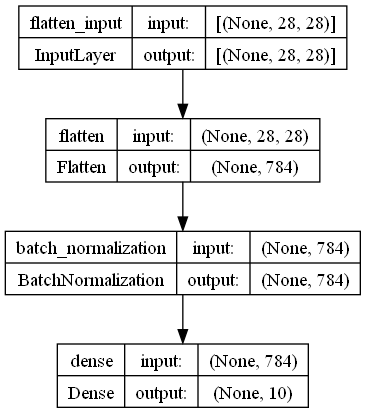

In [31]:
plot_model(model_softmax, show_shapes=True, show_layer_names=True, to_file='softmax_model.png')

In [32]:
model_softmax.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

### Train

In [33]:
history_softmax = model_softmax.fit(x=X_train, y=y_sparse_train, validation_data=(X_test, y_sparse_test), batch_size=256, epochs=20)

Epoch 1/20
235/235 [==============================] - 1s 3ms/step - loss: 0.6750 - accuracy: 0.7659 - val_loss: 0.5191 - val_accuracy: 0.8173
Epoch 2/20
235/235 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.8377 - val_loss: 0.4821 - val_accuracy: 0.8310
Epoch 3/20
235/235 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.8478 - val_loss: 0.4672 - val_accuracy: 0.8378
Epoch 4/20
235/235 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.8521 - val_loss: 0.4668 - val_accuracy: 0.8379
Epoch 5/20
235/235 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8551 - val_loss: 0.4575 - val_accuracy: 0.8415
Epoch 6/20
235/235 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8575 - val_loss: 0.4529 - val_accuracy: 0.8433
Epoch 7/20
235/235 [==============================] - 0s 2ms/step - loss: 0.4049 - accuracy: 0.8576 - val_loss: 0.4487 - val_accuracy: 0.8426
Epoch 

### Metrics

313/313 [==============================] - 0s 811us/step
Softmax Regression:
  Accuracy: 0.8446000218391418
  Loss: 0.447055846452713
  ROC AUC: 0.9834869888888889
  F1-score (macro): 0.8441835011339723
  F1-score (micro): 0.8446
  Precision: 0.844320717714918
  Recall: 0.8446


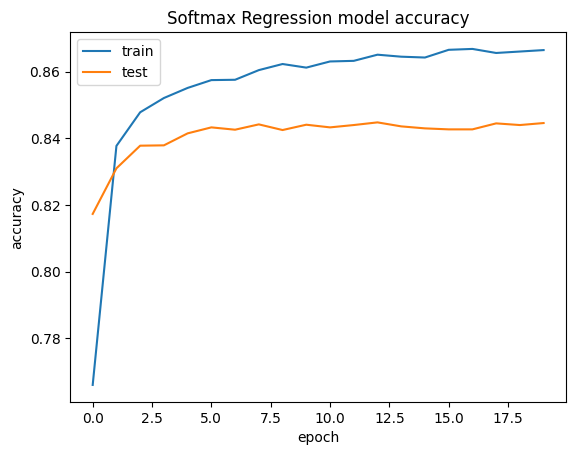

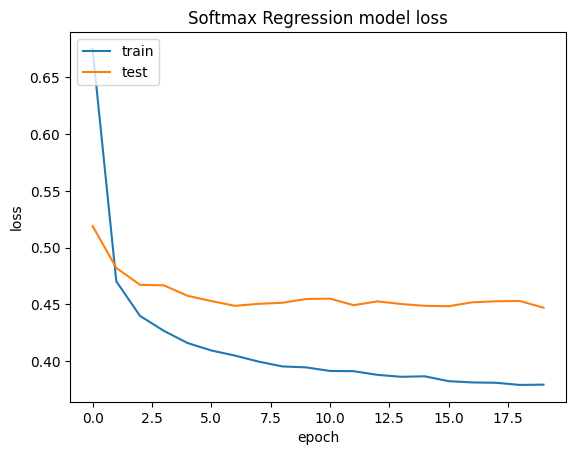

In [38]:
# Softmax Regression evaluation
y_pred_softmax = model_softmax.predict(X_test)
roc_auc_softmax = roc_auc_score(y_sparse_test, y_pred_softmax, multi_class='ovr', average='macro')
f1_macro_softmax = f1_score(y_sparse_test.argmax(axis=1), y_pred_softmax.argmax(axis=1), average='macro')
f1_micro_softmax = f1_score(y_sparse_test.argmax(axis=1), y_pred_softmax.argmax(axis=1), average='micro')
precision_softmax = precision_score(y_sparse_test.argmax(axis=1), y_pred_softmax.argmax(axis=1), average='macro')
recall_softmax = recall_score(y_sparse_test.argmax(axis=1), y_pred_softmax.argmax(axis=1), average='macro')

# Print the evaluation metrics
print("Softmax Regression:")
print("  Accuracy:", history_softmax.history['val_accuracy'][-1])
print("  Loss:", history_softmax.history['val_loss'][-1])
print("  ROC AUC:", roc_auc_softmax)
print("  F1-score (macro):", f1_macro_softmax)
print("  F1-score (micro):", f1_micro_softmax)
print("  Precision:", precision_softmax)
print("  Recall:", recall_softmax)

# Plot the learning curves
plt.plot(history_softmax.history['accuracy'])
plt.plot(history_softmax.history['val_accuracy'])
plt.title('Softmax Regression model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_softmax.history['loss'])
plt.plot(history_softmax.history['val_loss'])
plt.title('Softmax Regression model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

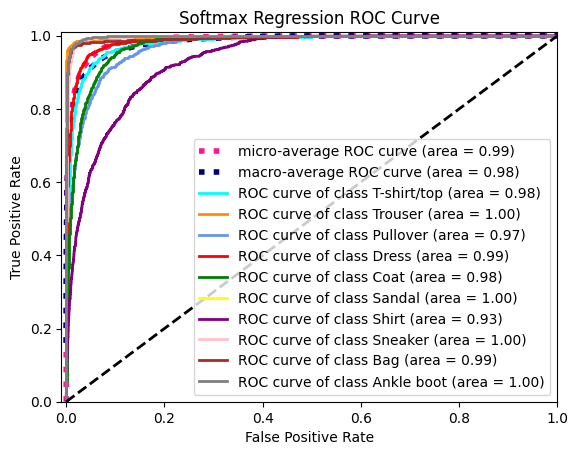

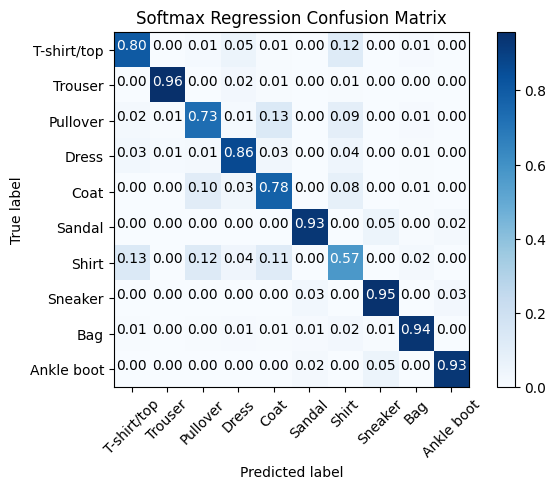

In [39]:
plot_ROC_curve(y_sparse_test, y_pred_softmax, class_names, title='Softmax Regression ROC Curve')
cnf_matrix = confusion_matrix(y_sparse_test.argmax(axis=1), y_pred_softmax.argmax(axis=1))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Softmax Regression Confusion Matrix')

In [40]:
clear_session()